In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from luwiji.knn import illustration,demo

In [2]:
demo.knn()

interactive(children=(IntSlider(value=1, description='N', max=11, min=1, step=2), FloatSlider(value=-5.0, desc…

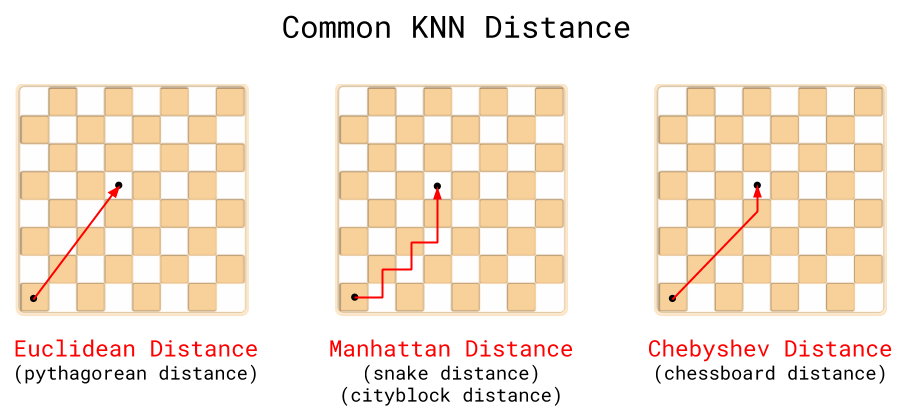

In [3]:
illustration.knn_distance

In [4]:
df = pd.read_csv("data/titanic.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


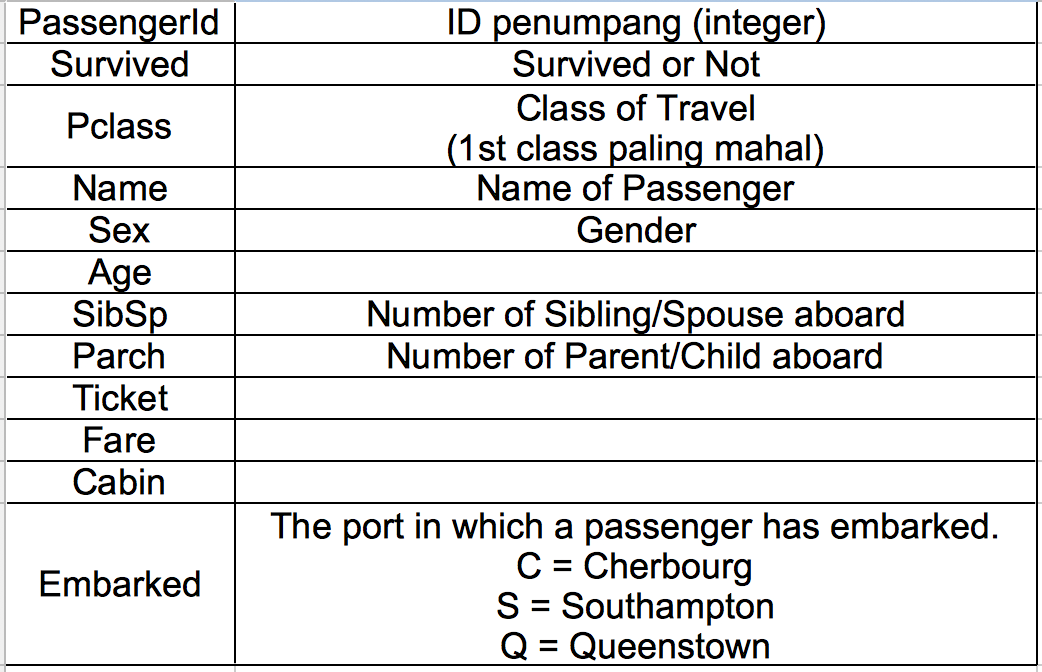

In [5]:
illustration.nomenklatur

In [6]:
df.drop(columns=["Name","Ticket"], inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


# Quick Exploratory Data Analysis (Quick EDA)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [9]:
from jcopml.plot import plot_missing_value

,missing_value,%
Survived,0,0.00
Pclass,0,0.00
Sex,0,0.00
Age,177,19.87
SibSp,0,0.00
Parch,0,0.00
Fare,0,0.00
Cabin,687,77.10
Embarked,2,0.22


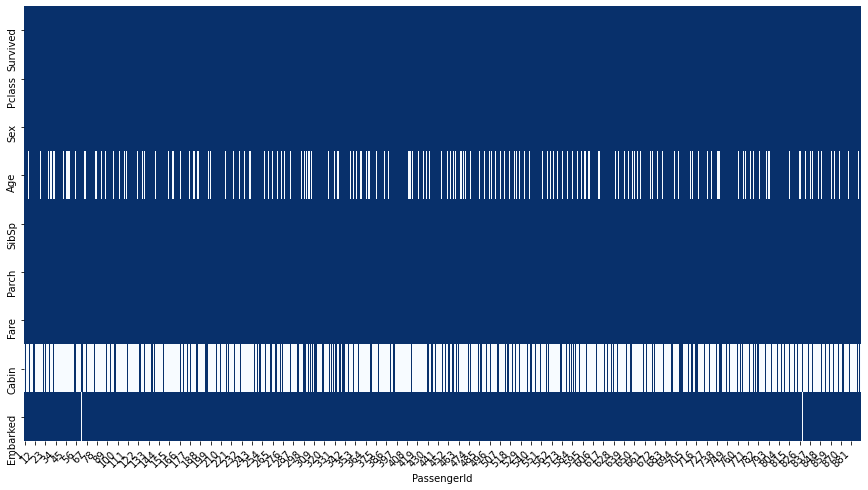

In [10]:
plot_missing_value(df,return_df=True)

In [11]:
df.drop(columns=["Cabin","Age"], inplace=True)

In [12]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


In [13]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
df.fillna({"Embarked":"S"}, inplace=True)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 88.0+ KB


# Persiapan Data

In [16]:
X = df.drop(columns="Survived")
y = df.Survived

X = pd.get_dummies(X, columns=["Pclass", "Sex", "Embarked"])

# Scikit Learn

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)

In [19]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.score(X,y)

0.8933782267115601

# Concept 1 : Dataset Splitting

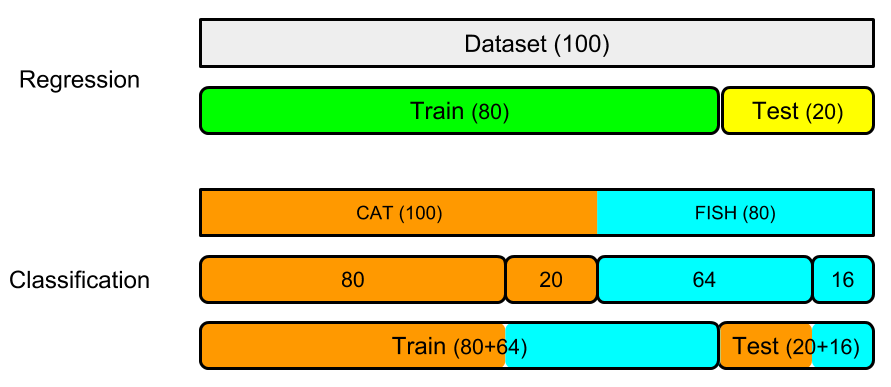

In [21]:
illustration.train_test_split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop(columns="Survived")
y = df.Survived

X = pd.get_dummies(X, columns=["Pclass", "Sex", "Embarked"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
knn.score(X_test,y_test)

0.7039106145251397

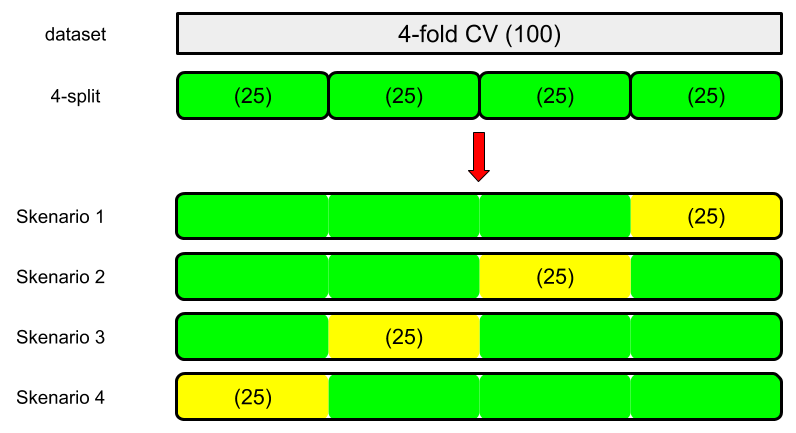

In [27]:
illustration.kfold_cv

# Concept 2 : K-Fold Cross Validation

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)
cross_val_score(knn, X, y, cv=5)

array([0.62569832, 0.65168539, 0.83146067, 0.7752809 , 0.74719101])

In [30]:
cross_val_score(knn, X, y, cv=5).mean()

0.7262632603100874

# Improvement Melalui Data : Feature Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [33]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
X_train_scaled

array([[0.        , 0.        , 0.11027246, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.43288417, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.125     , 0.5       , 0.06709553, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.075147  , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.05182215, ..., 0.        , 0.        ,
        1.        ]])

In [35]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [36]:
knn.score(X_test_scaled,y_test)

0.7150837988826816

# Improvement Melalui Model : Tuning Model with Parameter

In [45]:
n_neighbors= range(2,51,2)
train_score= []
test_score= []
for i in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn.score(X_train,y_train), knn.score(X_test,y_test)
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))

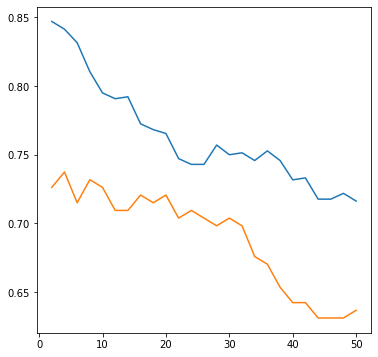

In [48]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.plot(n_neighbors, train_score)
ax.plot(n_neighbors, test_score)

In [54]:
np.argmax(n_neighbors)

24

In [51]:
print(f"Max score {np.max(test_score)}")
print(f"score maksimal pada neighbors {n_neighbors[np.argmax(test_score)]}")

Max score 0.7374301675977654
score maksimal pada neighbors 4


In [55]:
n_neighbors= range(2,51,2)
train_score= []
test_score= []
for i in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    knn.score(X_train_scaled,y_train)
    knn.score(X_test_scaled,y_test)
    train_score.append(knn.score(X_train_scaled,y_train))
    test_score.append(knn.score(X_test_scaled,y_test))

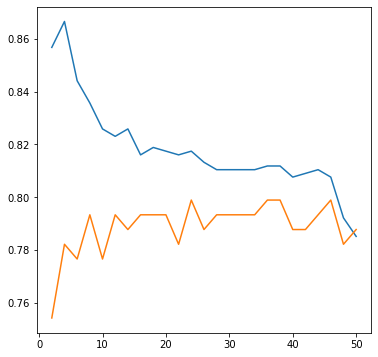

In [56]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.plot(n_neighbors, train_score)
ax.plot(n_neighbors, test_score)

In [57]:
print(f"Max score {np.max(test_score)}")
print(f"score maksimal pada neighbors {n_neighbors[np.argmax(test_score)]}")

Max score 0.7988826815642458
score maksimal pada neighbors 24


Max score 0.7932960893854749
score maksimal pada neighbors 8


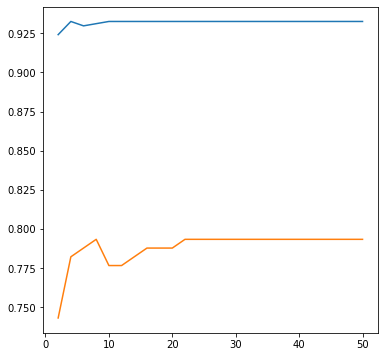

In [58]:
n_neighbors= range(2,51,2)
train_score= []
test_score= []
for i in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=i, weights="distance", p=1)
    knn.fit(X_train_scaled, y_train)
    knn.score(X_train_scaled,y_train)
    knn.score(X_test_scaled,y_test)
    train_score.append(knn.score(X_train_scaled,y_train))
    test_score.append(knn.score(X_test_scaled,y_test))
    
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.plot(n_neighbors, train_score)
ax.plot(n_neighbors, test_score)

print(f"Max score {np.max(test_score)}")
print(f"score maksimal pada neighbors {n_neighbors[np.argmax(test_score)]}")

# Concept of Data Leakage

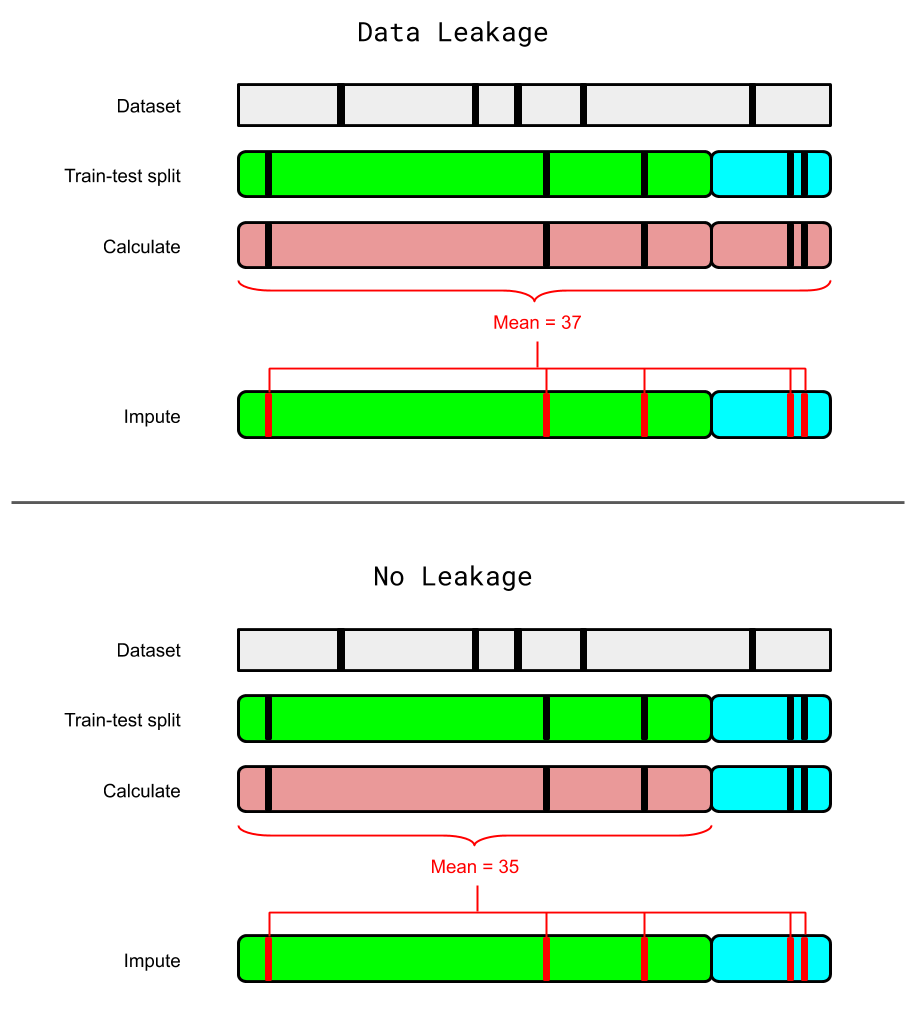

In [59]:
illustration.data_leakage

# Train Val Tes Split

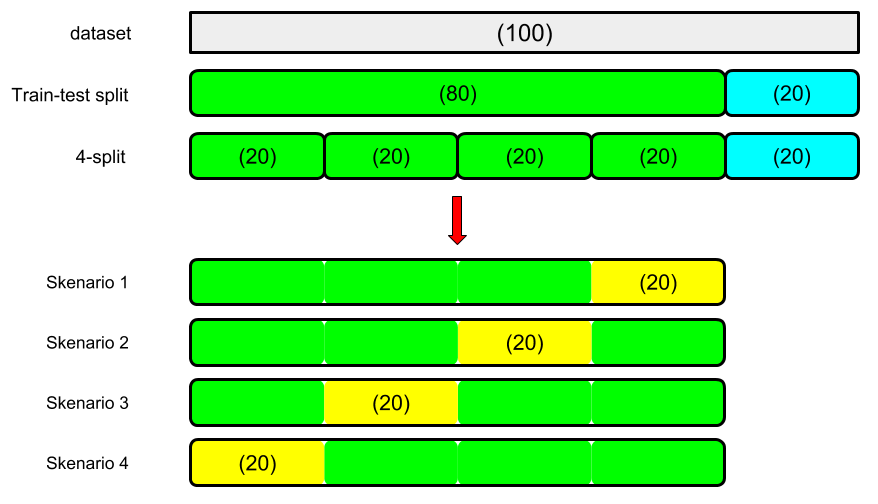

In [60]:
illustration.train_val_test

In [71]:
df = pd.read_csv("data/titanic.csv",index_col="PassengerId")
df.drop(columns=["Name", "Ticket", "Cabin", "Age"], inplace = True)

In [72]:
X = df.drop(columns="Survived")
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify= y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 6), (268, 6), (623,), (268,))

In [79]:
y_train

PassengerId
749    0
46     0
29     1
634    0
404    0
      ..
477    0
191    1
737    0
463    0
137    1
Name: Survived, Length: 623, dtype: int64

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.impute import SimpleImputer

In [68]:
num_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler())
])

cat_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("encode", OneHotEncoder())
])

In [67]:
from sklearn.compose import ColumnTransformer

In [73]:
X_train.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [75]:
preprocessor = ColumnTransformer([
    ("num_pipe", num_pipe,["Fare", "SibSp", "Parch"]),
    ("cat_pipe", cat_pipe,["PClass", "Sex", "Embarked"])
])

In [76]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsClassifier())
])

In [80]:
pipeline.fit(X_train, y_train)

ValueError: A given column is not a column of the dataframe